# Tasks for lectures 6-7
Build a feedforward neural network for font recognition based on the given datasets(excluded three large files with size > 100 MB as of limitations of github storage).

Step 0: import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

Step 1: fetch fonts csv urls from github api

In [ ]:
api_url = 'https://api.github.com/repos/DatenFluss/machine-learning-university-course/contents/res/fonts'
response = requests.get(api_url)
contents = response.json()

Step 2: extract url's of the csv files

In [ ]:
csv_urls = []
for item in contents:
    if item['name'].endswith('.csv'):
        raw_url = item['download_url']
        csv_urls.append(raw_url)

Step 3: load and combine the csv files

In [ ]:
dataframes = []
for url in csv_urls:
    df = pd.read_csv(url)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)

Step 4: verify the data

In [ ]:
print(data.head())
print('Combined data shape:', data.shape)

     font fontVariant  m_label  strength  italic  orientation  m_top  m_left  \
0  AGENCY   AGENCY FB    64258       0.4       0          0.0     35      21   
1  AGENCY   AGENCY FB    64257       0.4       0          0.0     35      21   
2  AGENCY   AGENCY FB    61442       0.4       0          0.0     35      21   
3  AGENCY   AGENCY FB    61441       0.4       0          0.0     35      21   
4  AGENCY   AGENCY FB     9674       0.4       0          0.0     51      21   

   originalH  originalW  ...  r19c10  r19c11  r19c12  r19c13  r19c14  r19c15  \
0         51         22  ...       1       1       1       1       1       1   
1         51         22  ...       1       1       1       1       1       1   
2         51         22  ...       1       1       1       1       1       1   
3         51         22  ...       1       1       1       1       1       1   
4         33         25  ...     255     132       1       1       1       1   

   r19c16  r19c17  r19c18  r19c19  
0 

Step 5: preprocess the data

In [ ]:
pixel_columns = ['r{}c{}'.format(r, c) for r in range(20) for c in range(20)]
X = data[pixel_columns].values
y = data['font'].values

Step 6: encode the labels

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes)

Step 7: normalize pixel data

In [ ]:
X = X / 255.0

Step 8: Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

Step 9: Build the model for a feedforward neural network.

Additional possible improvements:
Dropout Layers: Prevent overfitting by randomly dropping neurons during training.
L2 Regularization: Penalize large weights to encourage simpler models.

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=400, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 9: Compile the model

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Step 10: Train the model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/20
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.2267 - loss: 3.5198 - val_accuracy: 0.3241 - val_loss: 2.8343
Epoch 2/20
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.3442 - loss: 2.7278 - val_accuracy: 0.3635 - val_loss: 2.6227
Epoch 3/20
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.3828 - loss: 2.5076 - val_accuracy: 0.3801 - val_loss: 2.5252
Epoch 4/20
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.4038 - loss: 2.3938 - val_accuracy: 0.3930 - val_loss: 2.4596
Epoch 5/20
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.4185 - loss: 2.3136 - val_accuracy: 0.4035 - val_loss: 2.4092
Epoch 6/20
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.4303 - loss: 2.2545 - val_accuracy: 0.4058 - val_loss: 2.3950
Epoch 7/20
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.4376 - loss: 2.2150 - val_accuracy: 0.4150 - val_loss: 2.3673
Epoch 8/20
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.4445 - loss: 2

Step 11: Evaluate the model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

3277/3277 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4319 - loss: 2.3212
Test accuracy: 0.4320785105228424


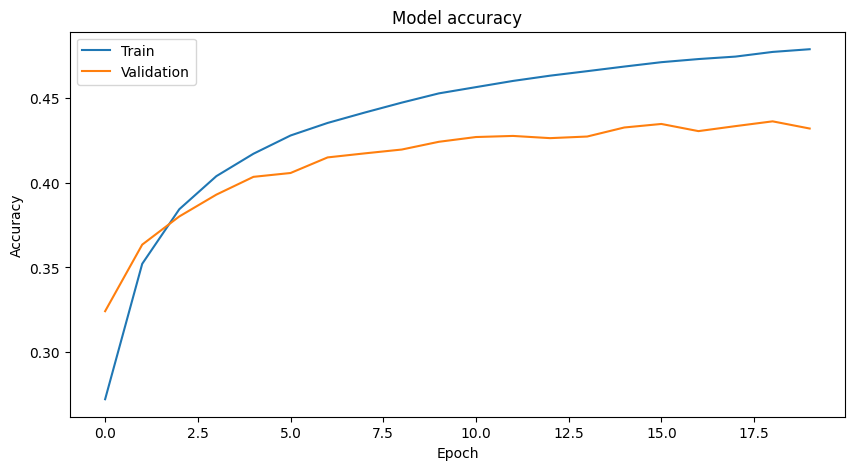

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

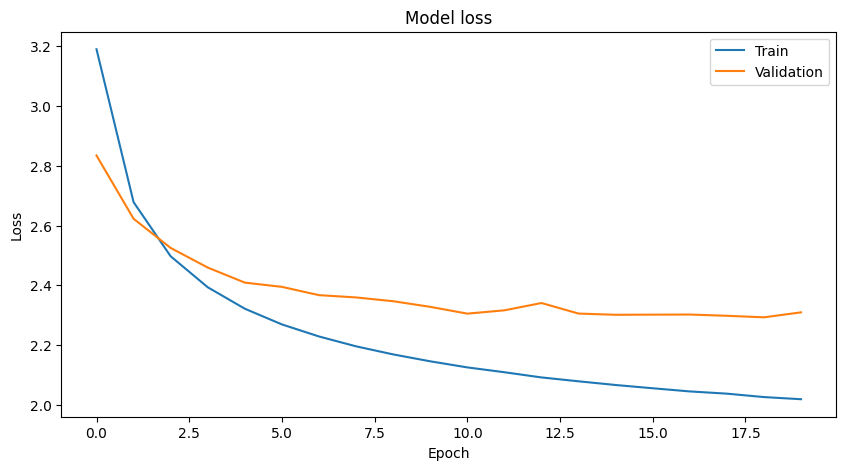

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Limited results are achieved because of the usage of feedforward neural network, can be improved with convolutional neural network